#Context:

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#Attribute Information:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
#importing file to colab

from google.colab import files 
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head(5)  #displaying first 5 samples from the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()  #summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe() #descriptive info

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##DATA PREPROCESSING & Feature Engineering


In [ ]:
df_clean = df.copy()

# drop 'id' column since it doesn't have asignificance on the analysis

df_clean.drop('id', axis=1, inplace=True)

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#categorical variables to numeric

categorical_data = ['gender','hypertension','heart_disease','ever_married', 'work_type','Residence_type','smoking_status','stroke']


# Check Unique Values in each Column

for col in categorical_data:
    print(f'\n\n===== {col} =====')
    print(df_clean[col].value_counts())



===== gender =====
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


===== hypertension =====
0    4612
1     498
Name: hypertension, dtype: int64


===== heart_disease =====
0    4834
1     276
Name: heart_disease, dtype: int64


===== ever_married =====
Yes    3353
No     1757
Name: ever_married, dtype: int64


===== work_type =====
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


===== Residence_type =====
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


===== smoking_status =====
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


===== stroke =====
0    4861
1     249
Name: stroke, dtype: int64


In [ ]:
#since 'other' gender is only 1, drop it

df_clean.drop(df_clean[df_clean.gender == "Other"].index[0],axis=0,inplace=True)

In [ ]:
df_clean.shape  # after droping one row and one column

(5109, 11)

In [ ]:
#checking for features having more than >2 categories
# i.e.
#work_type
#smoking_status

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_clean['work_type'] = le.fit_transform(df_clean['work_type'])
df_clean['smoking_status'] = le.fit_transform(df_clean['smoking_status'])

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,2,Urban,228.69,36.6,1,1
1,Female,61.0,0,0,Yes,3,Rural,202.21,NaN,2,1
2,Male,80.0,0,1,Yes,2,Rural,105.92,32.5,2,1
3,Female,49.0,0,0,Yes,2,Urban,171.23,34.4,3,1
4,Female,79.0,1,0,Yes,3,Rural,174.12,24.0,2,1


In [ ]:
#encode the binomial features

#gender
#ever_married
#Residence_type

df_clean['gender'] = le.fit_transform(df_clean['gender'])
df_clean['ever_married'] = le.fit_transform(df_clean['ever_married'])
df_clean['Residence_type'] = le.fit_transform(df_clean['Residence_type'])

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


##a. Apply one of the best-known imputation methods to handle the missing/infinite values and state the significance of the used method if required.

In [ ]:
#shows missing values
df_clean.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has missing values

In [ ]:
# checking for infinity
df_clean.isin([np.inf, -np.inf]).sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
impute_bmi = KNNImputer(n_neighbors = 5, weights = 'uniform')
df_clean['bmi'] = impute_bmi.fit_transform(df_clean[['bmi']])

In [ ]:
#check imputation

df_clean.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##Significance of the KNNImputer:

It uses n_neighbours and euclidean distance between them to impute the missing BMI values.

In [ ]:
print(df_clean.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


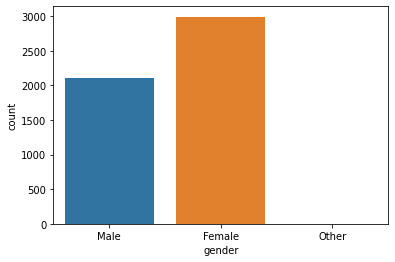

In [ ]:
print(df["gender"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['gender'],label="Count")

0    4612
1     498
Name: hypertension, dtype: int64


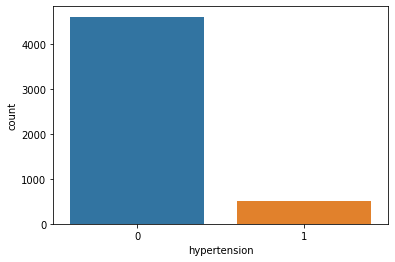

In [ ]:
print(df["hypertension"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['hypertension'],label="Count")

#Hypertension & Stroke: 
Hypertension results in having high risk for stroke.

0    4834
1     276
Name: heart_disease, dtype: int64


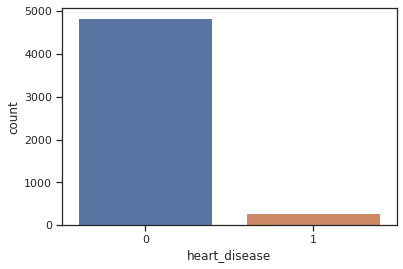

In [ ]:
print(df["heart_disease"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['heart_disease'],label="Count")

#Heart disease & Stroke: 
Those previously diagnosed with any sort of a heart disease are highly at risk of getting a stroke.

Yes    3353
No     1757
Name: ever_married, dtype: int64


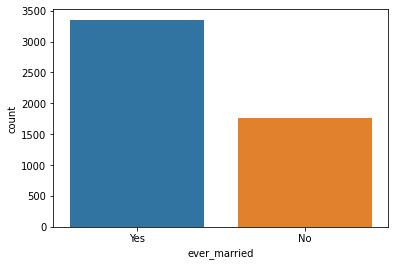

In [ ]:
print(df["ever_married"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['ever_married'],label="Count")

#Ever married vs Stroke: 
Married people (ever married) are highly at risk of getting a stroke.


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


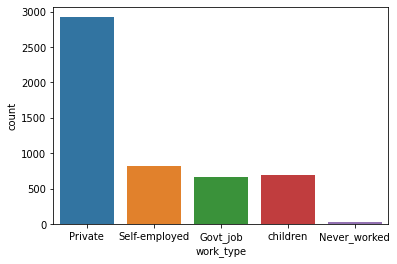

In [ ]:
print(df["work_type"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['work_type'],label="Count")

#Work type & Stroke: 
People with any sort of work experience and in private related work are highly at the risk of getting a stroke. While those with zero/no experience of work barely got a stroke.


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


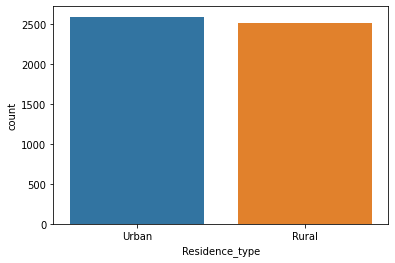

In [ ]:
print(df["Residence_type"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['Residence_type'],label="Count")

#Residence type & Stroke: 
No obvious relationship between place of residence and experiencing a stroke.


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


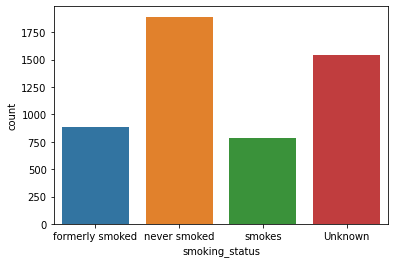

In [ ]:
print(df["smoking_status"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['smoking_status'],label="Count")

#Smoking status & Stroke: 
Being a smoker or those who have quitted smoking have an increased risk of experiencing a stroke.

Some unknown (major) reason is also underlining the stroke issue and it's future risk.

0    4861
1     249
Name: stroke, dtype: int64


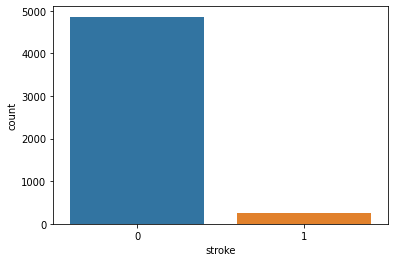

In [ ]:
print(df["stroke"].value_counts())

#Visualize this stroke count i.e. 0 & 1 
sns.countplot(df['stroke'],label="Count")

<Figure size 720x720 with 0 Axes>

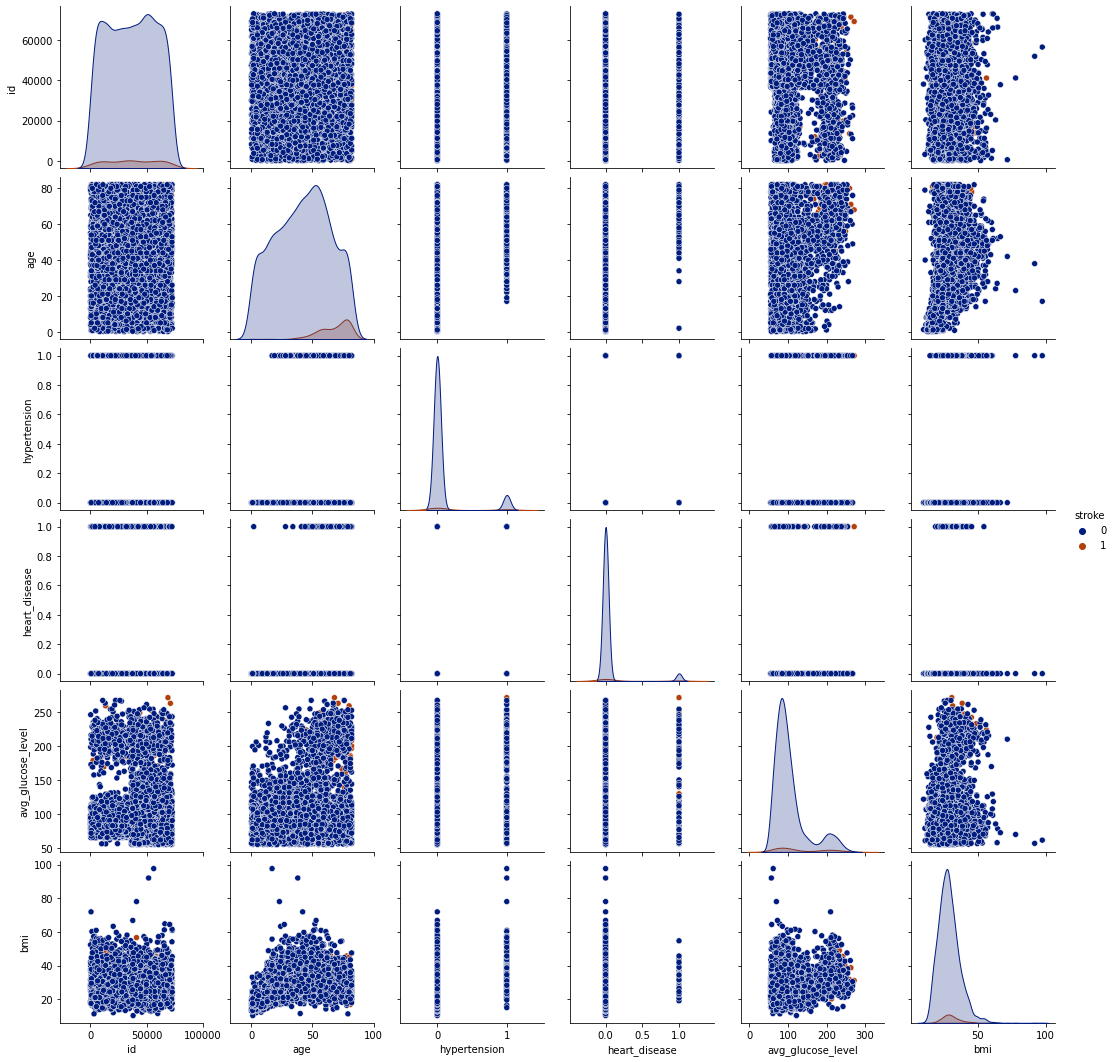

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, palette='dark', hue='stroke');

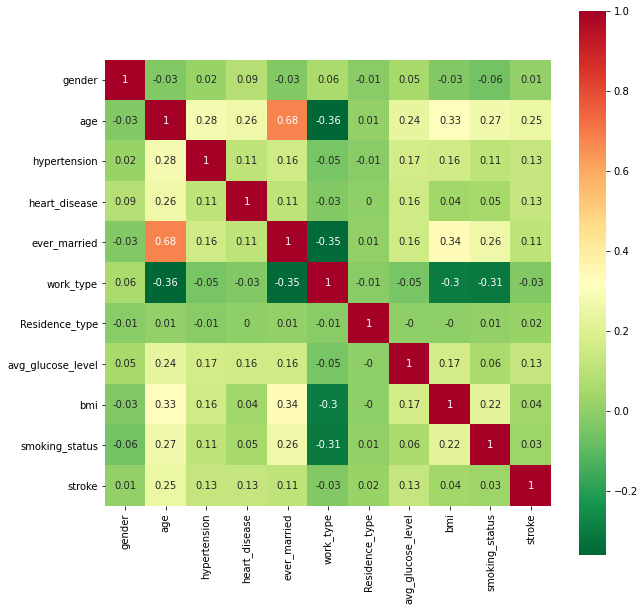

In [ ]:
#studying overall correlation using Heatmap

correlation = df_clean.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation.round(2), annot = True, vmax = 1, square = True, cmap = 'RdYlGn_r')
plt.show()

For correlation coefficient, a +1 means a perfect positive correlation, which means if one increases the other also increases. While, -1 means the relationship that exists between two variables is negative all the times. (i.e. when one decreases, the other increases)

#Ever married and Age are highly correlated

##b. Visualize the data in 3-D scatter plot and write the inferences, How the data look like.

In [ ]:
num_continuous_data = ['age','avg_glucose_level','bmi']  #numerical data

import plotly.express as px

fig = px.scatter_3d(df_clean, x='age', y='avg_glucose_level', z='bmi', color='stroke')
fig.show()

Few people seem to get stroke. (yellow dots are less in number than the blue dots)

People >55 yrs of age experience more stroke (hover on yellow dots for detailed information)

##c. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, again visualize the data in 3-D scatter plot to show the outlier effect and write the inferences. 

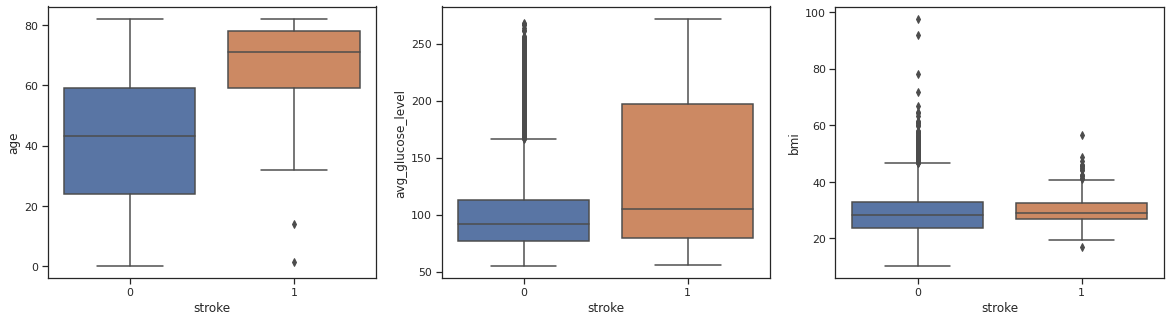

In [ ]:
### Boxplot with outliers:

#boxplot to be drwan on continuous data
# i.e. num_continuous_data = ['age','avg_glucose_level','bmi']  #numerical data

    ### Stroke vs age
    ### Stroke vs avg_glucose_level
    ### Stroke vs bmi

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'stroke', y = 'age', data = df_clean)
plt.subplot(1,3,2)
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df_clean)
plt.subplot(1,3,3)
sns.boxplot(x = 'stroke', y = 'bmi', data = df_clean)
plt.show()

##Observations of Boxplot- 
Isolated points that can be seen in the box-plots above are the outliers in the dataset.

Age represents a very good feature, due to very few outliers.

Average Glucose level seems an interesting feature (box span is more)

BMI does not seems to be a good feature (many outliers & the box span is also less)




Stroke experiencing people tends to have a higher mean age.

Stroke experiencing people tends to have a higher average glucose level.

BMI doesnot gives a good representation.



In [ ]:
#removing outliers using Inter-Quartile Range

Q1 = df_clean[['age','avg_glucose_level','bmi']].quantile(0.25)
Q3 = df_clean[['age','avg_glucose_level','bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR,'\n')

df_no_outliers = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) |(df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape

age                  36.00
avg_glucose_level    36.85
bmi                   9.00
dtype: float64 



(4390, 11)

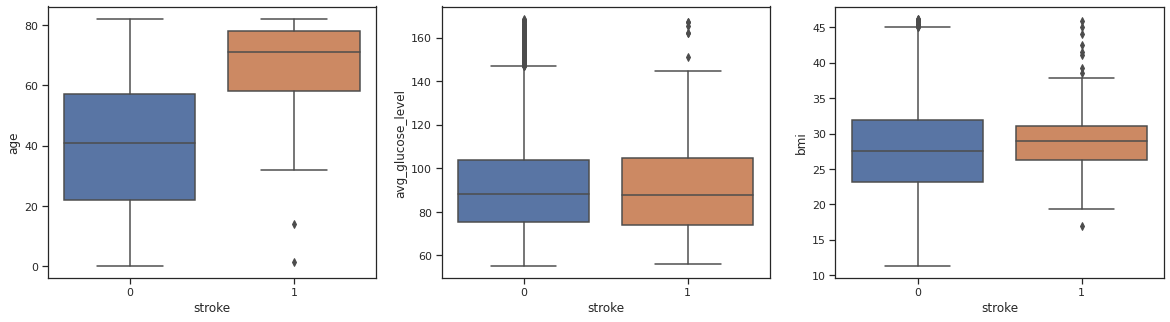

In [ ]:
### Boxplot with outliers:

#boxplot to be drwan on continuous data
# i.e. df_num_continuous_data = ['age','avg_glucose_level','bmi']  #numerical data

    ### Stroke vs age
    ### Stroke vs avg_glucose_level
    ### Stroke vs bmi

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'stroke', y = 'age', data = df_no_outliers)
plt.subplot(1,3,2)
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df_no_outliers)
plt.subplot(1,3,3)
sns.boxplot(x = 'stroke', y = 'bmi', data = df_no_outliers)
plt.show()

##Outliers effect:

Observation on Boxplot (after outliers removal)-

-Skewness is reduced

-Mean changes

In [ ]:
#3D scatter plot for df_no_outliers


import plotly.express as px

fig = px.scatter_3d(df_no_outliers, x='age', y='avg_glucose_level', z='bmi', color='stroke')
fig.show()

##d. Normalized the data if required, and write a note for what, why and how you performed normalization.

In [ ]:
from sklearn.preprocessing import StandardScaler

num_continuous_data = ['age','avg_glucose_level','bmi']  #numerical data

s = StandardScaler()

data_normed = s.fit_transform(df_clean[['age','avg_glucose_level','bmi']])
data_normed = pd.DataFrame(data_normed, columns=num_continuous_data)

df_clean = df_clean.drop(columns=num_continuous_data, axis=1)
df_clean.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,1,0,1,1,2,1,1,1
1,0,0,0,1,3,0,2,1
2,1,0,1,1,2,0,2,1
3,0,0,0,1,2,1,3,1
4,0,1,0,1,3,0,2,1


In [ ]:
data_normed.head()

,age,avg_glucose_level,bmi
0,1.051242,2.706450,1.001034e+00
1,0.785889,2.121652,4.615423e-16
2,1.626174,-0.004867,4.683922e-01
3,0.255182,1.437473,7.152261e-01
4,1.581949,1.501297,-6.358651e-01


In [ ]:
df_new = pd.concat([df_clean, data_normed], axis=1)  #joining the dataframe
df_new.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.051242,2.706450,1.001034e+00
1,0.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,0.785889,2.121652,4.615423e-16
2,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.626174,-0.004867,4.683922e-01
3,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.255182,1.437473,7.152261e-01
4,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,1.581949,1.501297,-6.358651e-01


In [ ]:
df_new.shape

(5110, 11)

##Normalization:

#Purpose- 
It is done if some of the columns have very high numeric values, they will suppress the affect of other columns. Columns with lesser values wouldn't show much in the model.

IQR shows high values for- age                  36.00, 
avg_glucose_level    36.85, 
bmi                   9.00

Therefore, normalization was needed to scale down the above values.

#Method-
Normalization is a rescaling of the data from the original range. After normatlization, all values are within the new range of 0 and 1.

Norm. value = (x – min) / (max – min)

(First estimate the maximum and minimum values of a feature. Then calculate the normalized value of each data point by the above formula)

You could see that if 'x' (a feature sample value) is provided that is within the range of it's minimum and maximum values, then the normalized value caluclated will be in the range of 0 and 1. 

##e. Balance the data if required; you may increase the sample using upsampling if needed.

In [ ]:
# Check Balance for the Stroke Indicator on the normalized dataset
df_new = df_new.dropna()

stroke_stat = df_new.stroke.astype(int).sum()

print(f'Number of Stroke Labels {stroke_stat}')
print(f'Percent Data Stroke {stroke_stat/5110*100:0.2f} %')

Number of Stroke Labels 249
Percent Data Stroke 4.87 %


Only 5% of the data is labeled as experiencing a stroke. Therefore, if a classifier just guessed no stroke regardless of input, it would be correct in most of the 95% cases, while using the full dataset.

In [ ]:
df_new.shape

(5108, 11)

In [ ]:
## Splitting data into independent and dependent variables

X = df_new.drop(['stroke'], axis=1)
Y = df_new.stroke

In [ ]:
print(X.shape)
print(Y.shape)

(5108, 10)
(5108,)


In [ ]:
from imblearn.combine import SMOTETomek

smotet_upsampling = SMOTETomek(random_state=42)

X_resample, Y_resample = smotet_upsampling.fit_resample(X,Y)

In [ ]:
from collections import Counter

print('Original dataset shape after Data preprocessing & feature engineering {}'.format(Counter(Y)))

print('Resampled dataset shape {}'.format(Counter(Y_resample)))

Original dataset shape after Data preprocessing & feature engineering Counter({0.0: 4859, 1.0: 249})
Resampled dataset shape Counter({1.0: 4840, 0.0: 4840})


##f. Perform at least three clustering methods with varying cluster sizes. Perform any three best-known methods to find out correct cluster numbers for each method; how you finalized this cluster number.

In [ ]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 124)

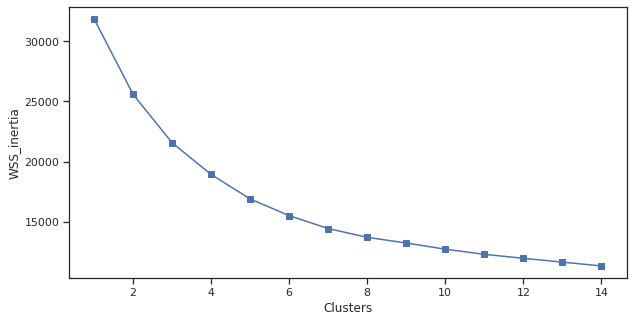

In [ ]:
#Applying clustering methods on the 'df_new' dataset

#Method 1: K-Means clustering

#K-means

seed=1
WSS_inertia_scaled = []

for cluster in range(1,15):
    km = KMeans(n_clusters = cluster, random_state=seed)
    km.fit(df_new)
    WSS_inertia_scaled.append(km.inertia_)


#Elbow method for plotting
df_Cluster_WSS_inertia = pd.DataFrame({'Cluster':range(1,15), 'WSS_inertia':WSS_inertia_scaled})

plt.figure(figsize=(10,5))
plt.plot(df_Cluster_WSS_inertia['Cluster'], df_Cluster_WSS_inertia['WSS_inertia'], marker='s')
plt.xlabel("Clusters")
plt.ylabel("WSS_inertia")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.1921291611851897
For n_clusters = 3 The average silhouette_score is : 0.22038371565336776
For n_clusters = 4 The average silhouette_score is : 0.19924816314649876
For n_clusters = 5 The average silhouette_score is : 0.21219293036893536
For n_clusters = 6 The average silhouette_score is : 0.19455024830252665


Text(0, 0.5, 'Silhouette Score')

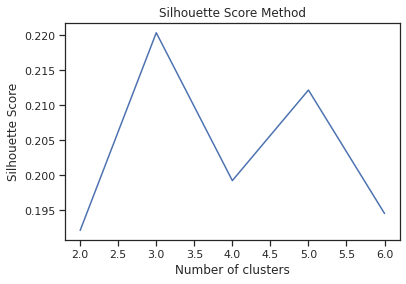

In [ ]:
# Silhouette Score Method for K-means clustering
from sklearn.metrics import silhouette_samples, silhouette_score

seed = 0
dict_sil_score_avg = dict()

#cluster_range = range(2,7)
for k in range(2,7):
    km = KMeans(n_clusters = k, random_state=seed)
    cluster_labels = km.fit_predict(df_new)
    
    sil_score_avg = silhouette_score(df_new, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", sil_score_avg)
    
    dict_sil_score_avg[k] = sil_score_avg


# Plotting a line graph to compare the silhouette_score for different values of clusters (i.e. 2,3,4,5,6)
silhouette_df = pd.Series(dict_sil_score_avg)

ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')

##K-Means Clustering
groups into clusters of equal variance by minimizing the inertia or within-cluster sum-of-squares (WSS).

Predicting the no. of cluster by Elbow Method

##Observations for K-means clustering-

The average silhouette score is maximized for clusters = 3. 
Hence, no. of clusters = 3

This score above gives insights into the separation between clusters and the density of each cluster.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


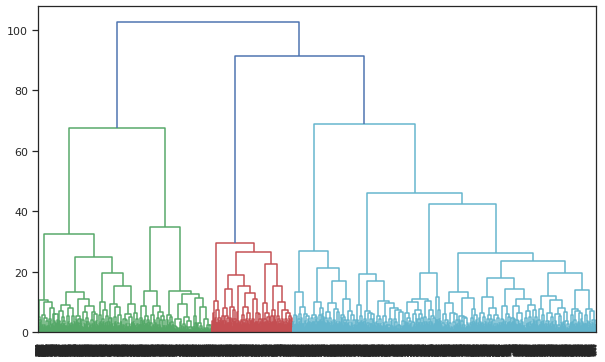

In [ ]:
##Method 2: Hierarchical clustering 

#dendograms

plt.figure(figsize=(10, 6))  
dendogram = shc.dendrogram(shc.linkage(df_new, method='ward'))

For n_clusters = 2 The average silhouette_score is : 0.16164509271000616
For n_clusters = 3 The average silhouette_score is : 0.1927986009432165
For n_clusters = 4 The average silhouette_score is : 0.19719219581350325
For n_clusters = 5 The average silhouette_score is : 0.19033200198595246
For n_clusters = 6 The average silhouette_score is : 0.15779932195682358


Text(0, 0.5, 'Silhouette Score')

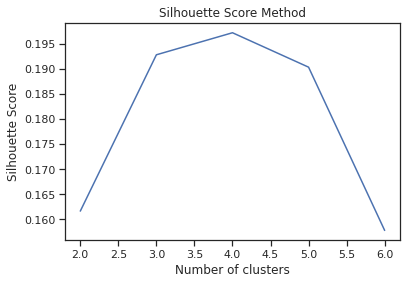

In [ ]:
# Silhouette Score Method for Heirachial clustering

seed = 0
dict_sil_score_avg_AC = dict()

for k in range(2,7):
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward') 
    cluster_labels = ac.fit_predict(df_new)
    
    sil_score_avg_AC = silhouette_score(df_new, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", sil_score_avg_AC)
    
    dict_sil_score_avg_AC[k] = sil_score_avg_AC


# Plotting a line graph to compare the silhouette_score for different values of clusters (i.e. 2,3,4,5,6)
silhouette_df_AC = pd.Series(dict_sil_score_avg_AC)

ax = silhouette_df_AC.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')

##Observation of Hierarchial Clustering:
For n_clusters = 4 The average silhouette_score is : 0.19719219581350325

Since, this is maximum, hence no. of clusters predicted =4

Text(0, 0.5, 'AIC & BIC values')

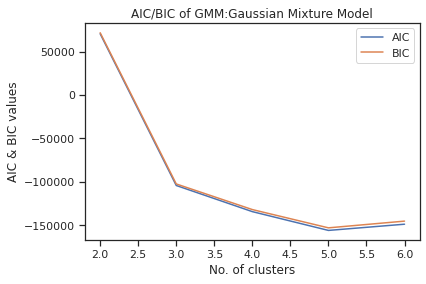

In [ ]:
#Method 3: Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

#estimating AIC (information criterion 1) & BIC (information criterion 2)- used to select optimal number of clusters. 
aic =dict()
bic =dict()
seed = 0

for k in range(2,7):
	gmm = GaussianMixture(n_components = k, random_state=seed)
	res = gmm.fit(df_new)
	IC_1 = gmm.aic(df_new)
	IC_2 = gmm.bic(df_new)
	aic[k] = IC_1
	bic[k] = IC_2
    
aic_df = pd.Series(aic)  #to dataframe
bic_df = pd.Series(bic)  ##to dataframe

temp = {'AIC' : aic_df, 'BIC' : bic_df}  #a dictionary to hold AIC & BIC values
ic_df = pd.DataFrame(temp)

ax = ic_df.plot(title='AIC/BIC of GMM:Gaussian Mixture Model')
ax.set_xlabel('No. of clusters')
ax.set_ylabel('AIC & BIC values')

##Observation of GMM:

GMM is a probabilistic model which implements Expectation-Maximization algo. (EM algo)

For minimum values of AIC & BIC, the optimal no. of clusters predicted = 5

In [ ]:
GMM3 = GaussianMixture(n_components = 2, random_state=seed)
pred_GMM3 = GMM3.fit_predict(df_new)

df_new['cluster'] = pred_GMM3
print(df_new['cluster'].value_counts())

sh_score_GMM = silhouette_score(df_new, pred_GMM3)
print("GMM Silhouette score of clusters (=2) by GMM:",sh_score_GMM)

0    3030
1    2078
Name: cluster, dtype: int64
GMM Silhouette score of clusters (=2) by GMM: 0.18767249197432856


#Different methods predicts different no. of clusters. 

(Kmeans predicts 3, HC predicts 4, GMM predicts 5) (Here, cluster no. with highest Silhouette score is taken).

Therefore, we can infer from Silhouette score for 2 clusters for each method. It is as follows:

For n_clusters = 2 The average silhouette_score for Kmeans is : 0.1921291611851897

For n_clusters = 2 The average silhouette_score is for Hier. clustering is 0.16164509271000616

GMM Silhouette score of clusters (=2) by GMM: 0.18767249197432856

.....Hence, Kmeans clustering can be considered as a better method among the above 3 methods


##g. Perform at least three supervised methods for classification, and report at least three performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC, sensitivity and specificity) with proper reason. 

In [ ]:
dict_models = dict() #to store models

dict_models['Logistic Regression'] = LogisticRegression()
dict_models['Decision Tree Algorithm'] = DecisionTreeClassifier()
dict_models['Naive Bayes Alogorithm'] = GaussianNB()
dict_models['k Nearest Neighboour Method-kNN'] = KNeighborsClassifier()
dict_models['Random Forest Method'] = RandomForestClassifier()
dict_models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')

dict_models['KMeans Clustering'] = KMeans(n_clusters=2, n_init=10, random_state=101)  # to compare KMeans clustering (for 2 stroke labels) results with other classification outputs

In [ ]:
for model in dict_models:
    dict_models[model].fit(x_train, y_train)    #fitting the model
    print(model, " model fitting is completed.")


print("\n\nPredictions made on Test-dataset:\n")

for x in dict_models:
    print('_'*30 + x + '_'*50)    #output printing pattern

    #iterate over each model/algo
    model = dict_models[x]         

    #predict y for test dataset
    y_pred = model.predict(x_test)  
    
    #to store actual values and predicted values of y
    store_test_results = {'y_true':y_test, 'y_pred':y_pred}
    
    #to print he Confusion Matrix
    print("CM:\n", confusion_matrix(**store_test_results))

    #to print the report
    print('\n', classification_report(**store_test_results),'\n')

Logistic Regression  model fitting is completed.
Decision Tree Algorithm  model fitting is completed.
Naive Bayes Alogorithm  model fitting is completed.
k Nearest Neighboour Method-kNN  model fitting is completed.
Random Forest Method  model fitting is completed.
Support Vector Machine  model fitting is completed.
KMeans Clustering  model fitting is completed.


Predictions made on Test-dataset:

______________________________Logistic Regression__________________________________________________
CM:
 [[1464    1]
 [  68    0]]

               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1465
         1.0       0.00      0.00      0.00        68

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533
 

______________________________Decision Tree Algorithm__________________________________________________
CM:
 [[1378   87]
 [  52   16]]


In [ ]:
#iterate over each model/algo
for i in dict_models:
    model = dict_models[i]

    #printing accuracy
    print(i, ' Model : Accuary Score= ', accuracy_score(y_test, model.predict(x_test)).round(5))

Logistic Regression  Model : Accuary Score=  0.95499
Decision Tree Algorithm  Model : Accuary Score=  0.90933
Naive Bayes Alogorithm  Model : Accuary Score=  0.89106
k Nearest Neighboour Method-kNN  Model : Accuary Score=  0.95238
Random Forest Method  Model : Accuary Score=  0.95369
Support Vector Machine  Model : Accuary Score=  0.92368
KMeans Clustering  Model : Accuary Score=  0.28898


Top 3 classification models are:

Logistic Regression  Model : Accuary Score=  0.95499

Random Forest Method  Model : Accuary Score=  0.95369

k Nearest Neighboour Method-kNN  Model : Accuary Score=  0.95238


Confusion Matrix also gives an idea of Type 2 error. i.e. stroke subjects predicted as stroke free 

In [ ]:
#cross validate for 100 steps

from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

scores_CV = cross_val_score(gnb, x_train, y_train, cv = 100, scoring='accuracy')

print('Cross-validation scores:', scores_CV)

print('\nMean of all the above 100 cross-validation score: {:.5f}'.format(scores_CV.mean()))

Cross-validation scores: [0.88888889 0.97222222 0.83333333 0.88888889 0.91666667 0.86111111
 0.80555556 0.91666667 0.88888889 0.86111111 0.80555556 0.80555556
 0.91666667 0.91666667 0.83333333 0.88888889 0.83333333 0.86111111
 0.91666667 0.86111111 0.94444444 0.83333333 0.88888889 0.83333333
 0.91666667 0.88888889 0.88888889 0.91666667 0.88888889 0.77777778
 0.77777778 0.86111111 0.91666667 0.80555556 0.91666667 0.91666667
 0.77777778 0.86111111 0.94444444 0.94444444 0.88888889 0.91666667
 0.91666667 0.88888889 0.91666667 0.83333333 0.91666667 0.86111111
 0.88888889 0.91666667 0.86111111 0.86111111 0.86111111 0.86111111
 0.75       0.88888889 0.94444444 0.86111111 0.88888889 0.83333333
 0.94444444 0.86111111 0.94444444 0.91666667 0.80555556 0.88888889
 0.97222222 0.83333333 0.91666667 0.88888889 0.88888889 0.83333333
 0.94444444 0.83333333 0.86111111 0.91428571 0.91428571 0.82857143
 0.88571429 0.91428571 0.85714286 0.85714286 0.88571429 0.88571429
 0.85714286 0.91428571 0.91428571 0.8

NB Algo represents a better model.